## Data Visualization

Summary statistics like the mean and standard deviation can be great for attempting to quickly understand aspects of a dataset, but they can also be misleading if you make too many assumptions about how the data distribution looks.

Beyond Anscombe's Quartet

More recently Alberto Cairo created the Datasaurus dataset, which is amazingly insightful and artistic, but is built on the same idea that you just discovered. You can find the full dataset, and the visualizations on the Datasaurus link.

https://video.udacity-data.com/topher/2019/November/5dc49fcf_samestats-differentgraphs/samestats-differentgraphs.pdf

There are two main reasons for creating visuals using data:

*   Exploratory analysis is done when you are searching for insights. These visualizations don't need to be perfect. You are using plots to find insights, but they don't need to be aesthetically appealing. You are the consumer of these plots, and you need to be able to find the answer to your questions from these plots.
*   Explanatory analysis is done when you are providing your results for others. These visualizations need to provide you the emphasis necessary to convey your message. They should be accurate, insightful, and visually appealing.




Explanatory analysis is done when you are providing your results for others. These visualizations need to provide you the emphasis necessary to convey your message. They should be accurate, insightful, and visually appealing.

The five steps of the data analysis process:


* Extract - Obtain the data from a spreadsheet, SQL, the web, etc.
* Clean - Here we could use exploratory visuals.
* Explore - Here we use exploratory visuals.
* Analyze - Here we might use either exploratory or explanatory visuals.
* Share - Here is where explanatory visuals live.

Visuals can be bad if they:

* Don't convey the desired message.
* Are misleading.

This seems straightforward, but often visuals are created that do one or both of these unintentionally.

The Four Levels of Measurement
In order to choose an appropriate plot type or method of analysis for your data, you need to understand the types of data you have. One common method divides the data into four levels of measurement:

Qualitative or categorical types (non-numeric types)
1. Nominal data: pure labels without inherent order (no label is intrinsically greater or less than any other)
2. Ordinal data: labels with an intrinsic order or ranking (comparison operations can be made between values, but the magnitude of differences are not be well-defined)
Quantitative or numeric types
3. Interval data: numeric values where absolute differences are meaningful (addition and subtraction operations can be made)
4. Ratio data: numeric values where relative differences are meaningful (multiplication and division operations can be made)
All quantitative-type variables also come in one of two varieties: discrete and continuous.

Discrete quantitative variables can only take on a specific set values at some maximum level of precision.
Continuous quantitative variables can (hypothetically) take on values to any level of precision.
Distinguishing between continuous and discrete can be a little tricky – a rule of thumb is if there are few levels, and values can't be subdivided into further units, then it's discrete. Otherwise, it's continuous. If you have a scale that can only take natural number values between 1 and 5, that's discrete. A quantity that can be measured to two digits, e.g. 2.72, is best characterized as continuous, since we might hypothetically be able to measure to even more digits, e.g. 2.718. A tricky case like test scores measured between 0 and 100 can only be divided down to single integers, making it initially seem discrete. But since there are so many values, such a feature is usually considered as continuous.

When exploring your data, the most important thing to consider first is whether your data is qualitative or quantitative. In later lessons, you will see how this distinction impacts your choice of plots.

Quantitative and Categorical

* Quantitative can be further divided into Continuous or Discrete.

* Categorical data can be divided into Ordinal or Nominal.

Experts and researchers have determined the types of visual patterns that allow humans to best understand certain information. In general, humans are able to best understand data encoded with positional changes (differences in x- and y- position as we see with scatterplots) and length changes (differences in box heights as we see with bar charts and histograms).

Alternatively, humans struggle with understanding data encoded with color hue changes (as are unfortunately commonly used as an additional variable encoding in scatter plots - we'll study this in upcoming concepts) and area changes (as we see in pie charts, which often makes them not the best plot choice).

From Wikipedia, Chart junk refers to all visual elements in charts and graphs that are not necessary to comprehend the information represented on the graph or that distract the viewer from this information.

Examples of chart junk you saw in this video include:

* Heavy grid lines
* Unnecessary text
* Pictures surrounding the visual
* Shading or 3d components
* Ornamented chart axes

The data-ink ratio, credited to Edward Tufte, is directly related to the idea of chart junk. The more of the ink in your visual that is related to conveying the message in the data, the better.

Limiting chart junk increases the data-ink ratio.

Design Integrity Notes
It is key that when you build plots you maintain integrity for the underlying data.

One of the main ways discussed here for looking at data integrity was with the lie factor. Lie factor depicts the degree to which a visualization distorts or misrepresents the data values being plotted. It is calculated in the following way:

$\text{lie factor} =\frac{\Delta \text{visual}/\text{visual}_\text{start}}{\Delta \text{data}/\text{data}_\text{start}}$

​
The delta symbol (\DeltaΔ) stands for difference or change. In words, the lie factor is the relative change shown in the graphic divided by the actual relative change in the data. Ideally, the lie factor should be 1: any other value means that there is some mismatch in the ratio of depicted change to actual change.

https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/

Color can both help and hurt a data visualization. Three tips for using color effectively.

1. Before adding color to a visualization, start with black and white.

2. When using color, use less intense colors - not all the colors of the rainbow, which is the default in many software applications.

3. Color for communication. Use color to highlight your message and separate groups of interest. Don't add color just to have color in your visualization.

Additional Encodings
As seen earlier in the lesson, we typically try to use position on the x- and y- axes to encode, or depict the value of variables. If we have more than two variables, however, we have to start considering other visual encodings for the additional variables.

In general, color and shape are best for categorical variables, while the size of marker can assist in adding additional quantitative data, as we demonstrated here.

Only use these additional encodings when absolutely necessary. Often, overuse of these additional encodings suggest you are providing too much information in a single plot. Instead, it might be better to break the information into multiple individual messages, so the audience can understand every aspect of your message. You can also build in each aspect one at a time, which you saw in the previous lesson with Hans Rosling. This feels less overwhelming than if you just saw this plot all at once.

In [ ]:


    ''' Plot '''

    import matplotlib.pyplot as plt
    %matplotlib inline

    # Example 1. (Basic Line Plot)
        df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',''))

        ax = df_projects.groupby('approvalyear')['totalamt'].mean().plot(x='approvalyear', y='totalamt',
                                                                title ='Total Amount Approved per Year')

        ax.set_xlabel('Year')
        ax.set_ylabel('Amount $')
        plt.show()

    # Example 2. (Multiple Line Plot)

    # put the data set into long form instead of wide
    df_melt = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='GDP')

    # convert year to a date time
    df_melt['year'] = pd.to_datetime(df_melt['year'])

    def plot_results(column_name):
        # plot the results for Afghanistan, Albania, and Honduras
        fig, ax = plt.subplots(figsize=(8,6))

        df_melt[(df_melt['Country Name'] == 'Afghanistan') | 
                (df_melt['Country Name'] == 'Albania') | 
                (df_melt['Country Name'] == 'Honduras')].groupby('Country Name').plot('year', column_name, legend=True, ax=ax)
        ax.legend(labels=['Afghanistan', 'Albania', 'Honduras'])
        
    plot_results('GDP')


### Five Thirty Eight Style

In [ ]:
import pandas as pd
import matplotlib as plt
direct_link = 'https://raw.githubusercontent.com/Sharp-Data/visualizing-college-degrees-gender-gap/master/percent-bachelors-degrees-women-usa.csv'
women_majors = pd.read_csv(direct_link)
print(women_majors.info())
women_majors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           42 non-null     int64  
 1   Agriculture                    42 non-null     float64
 2   Architecture                   42 non-null     float64
 3   Art and Performance            42 non-null     float64
 4   Biology                        42 non-null     float64
 5   Business                       42 non-null     float64
 6   Communications and Journalism  42 non-null     float64
 7   Computer Science               42 non-null     float64
 8   Education                      42 non-null     float64
 9   Engineering                    42 non-null     float64
 10  English                        42 non-null     float64
 11  Foreign Languages              42 non-null     float64
 12  Health Professions             42 non-null     float

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [ ]:
under_20 = women_majors.loc[0, women_majors.loc[0] < 20]

In [ ]:
print(under_20)

Agriculture           4.229798
Architecture         11.921005
Business              9.064439
Computer Science     13.600000
Engineering           0.800000
Physical Sciences    13.800000
Name: 0, dtype: float64


In [ ]:
under_20.index

Index(['Agriculture', 'Architecture', 'Business', 'Computer Science',
       'Engineering', 'Physical Sciences'],
      dtype='object')

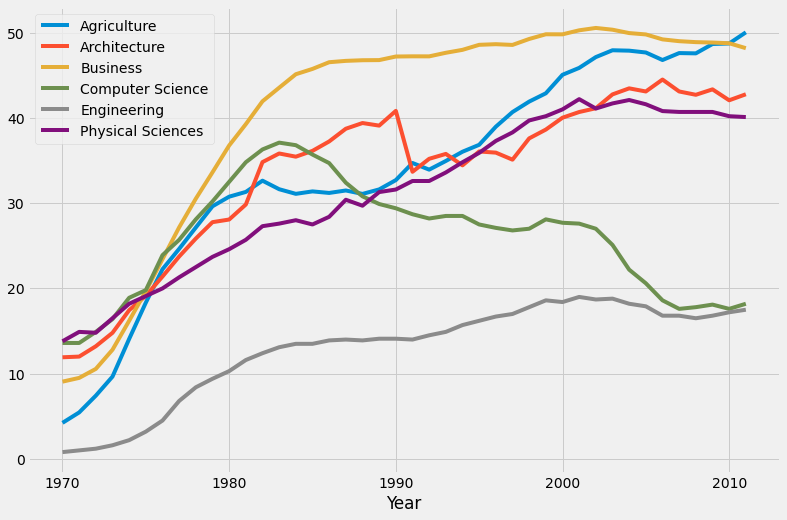

In [ ]:
under_20_graph = women_majors.plot(x = 'Year', y = under_20.index, figsize = (12,8))

In [ ]:
import matplotlib.style as style 
style.use('fivethirtyeight')

colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

# The previous code we modify
plt.rcParams["figure.dpi"] = 600
fte_graph = women_majors.plot(x = 'Year', y = under_20.index, figsize = (12,8), color = colors, legend = False)

# The previous code that remains unchanged
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
fte_graph.set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])
fte_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
fte_graph.xaxis.label.set_visible(False)
fte_graph.set_xlim(left = 1969, right = 2011)
fte_graph.text(x = 1965.8, y = -7,
    s = '   ©DATAQUEST                                                                                 Source: National Center for Education Statistics   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
fte_graph.text(x = 1966.65, y = 62.7, s = "The gender gap is transitory - even for extreme cases",
               fontsize = 26, weight = 'bold', alpha = .75)
fte_graph.text(x = 1966.65, y = 57,
               s = 'Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970',
              fontsize = 19, alpha = .85)

# Add colored labels
fte_graph.text(x = 1994, y = 38, s = 'Agriculture', color = cmap(1), weight = 'bold', rotation = 33,
              backgroundcolor = '#f0f0f0', bbox=dict(facecolor='none', edgecolor='none'))
fte_graph.text(x = 1985, y = 38, s = 'Architecture', color = cmap(0.8), weight = 'bold', rotation = 18,
              backgroundcolor = '#f0f0f0', bbox=dict(facecolor='none', edgecolor='none'))
fte_graph.text(x = 2004, y = 50, s = 'Business', color = cmap(0.6), weight = 'bold', rotation = -5,
               backgroundcolor = '#f0f0f0', bbox=dict(facecolor='none', edgecolor='none'))
fte_graph.text(x = 2001, y = 20, s = 'Computer Science', color = cmap(0.4), weight = 'bold', rotation = -42.5,
              backgroundcolor = '#f0f0f0', bbox=dict(facecolor='none', edgecolor='none'))
fte_graph.text(x = 1987, y = 11.5, s = 'Engineering', color = colors[4], weight = 'bold',
              backgroundcolor = '#f0f0f0', bbox=dict(facecolor='none', edgecolor='none'))
fte_graph.text(x = 1976, y = 18, s = 'Physical Sciences', color = colors[5], weight = 'bold', rotation = 27,
              backgroundcolor = '#f0f0f0', bbox=dict(facecolor='none', edgecolor='none'))

NameError: ignored

Text(1976, 18, 'Physical Sciences')

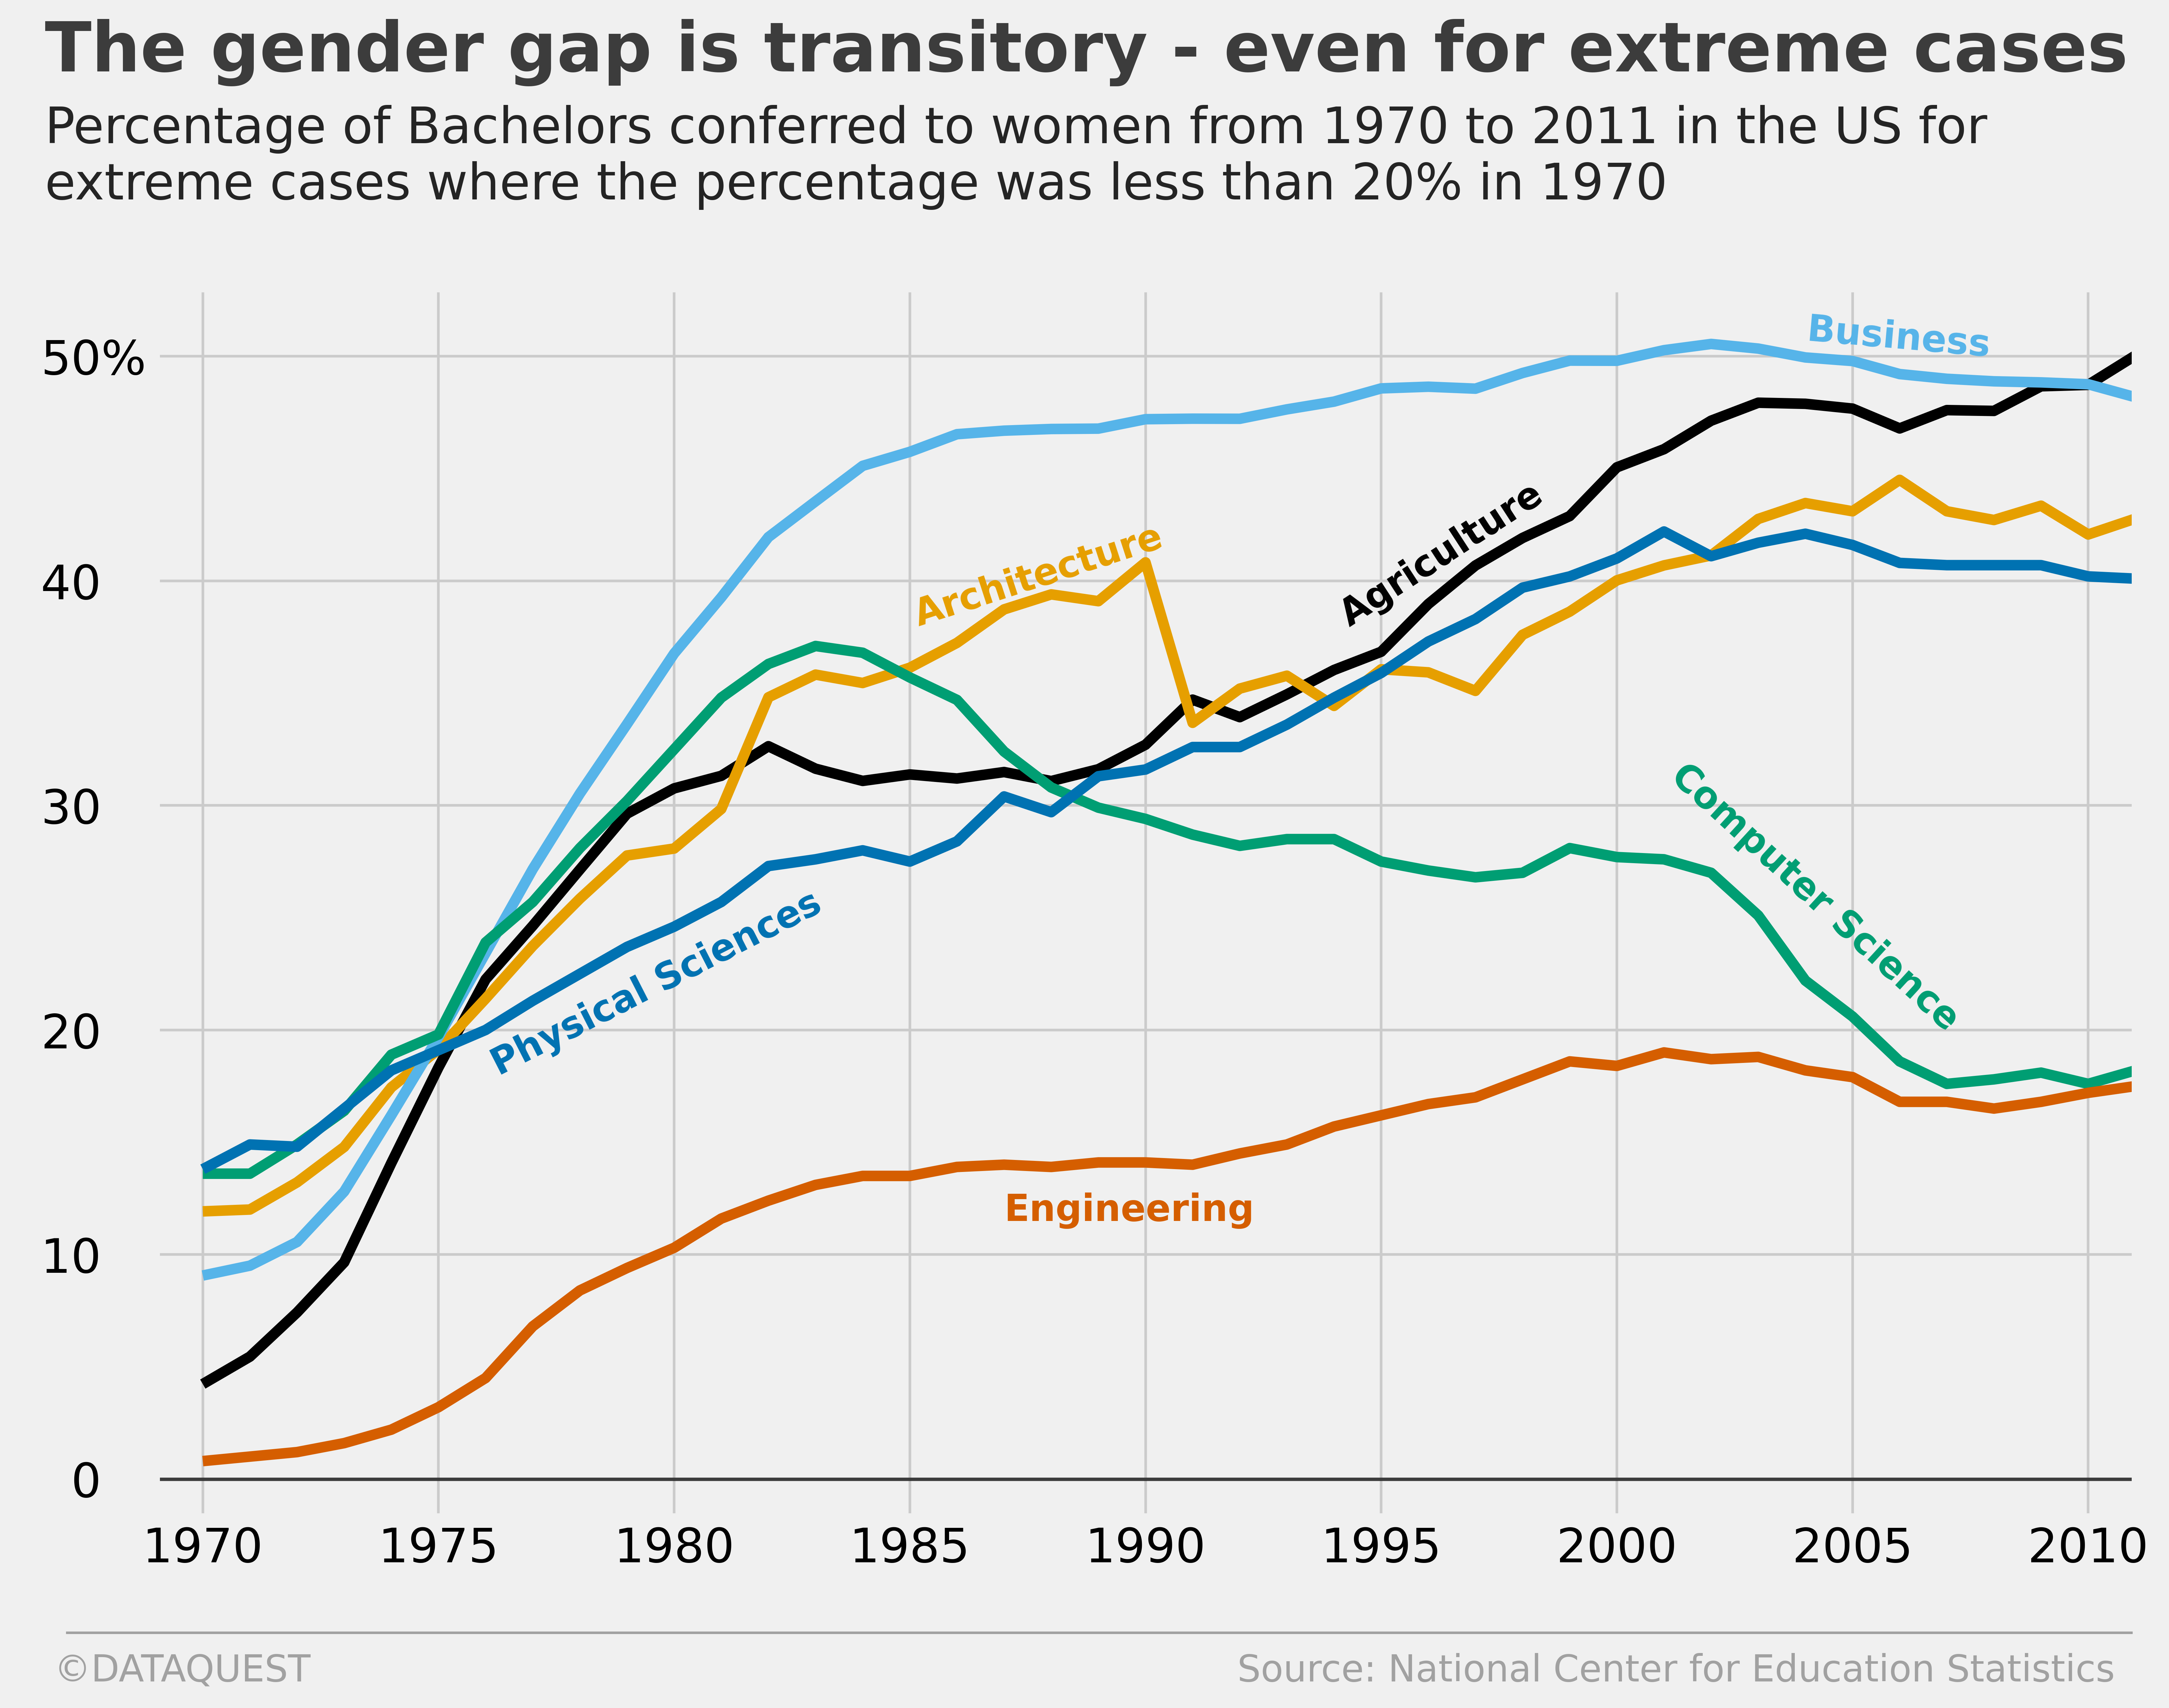

In [ ]:
import matplotlib.style as style 
style.use('fivethirtyeight')

# The previous code we modify
plt.rcParams["figure.dpi"] = 600
fte_graph = women_majors.plot(x = 'Year', y = under_20.index, figsize = (12,8), color = colors, legend = False)

# The previous code that remains unchanged
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
fte_graph.set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])
fte_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
fte_graph.xaxis.label.set_visible(False)
fte_graph.set_xlim(left = 1969, right = 2011)
fte_graph.text(x = 1967.1, y = -6.5,
    s = '________________________________________________________________________________________________________________',
    color = 'grey', alpha = .7)
fte_graph.text(x = 1966.1, y = -9,
    s = '   ©DATAQUEST                                                                               Source: National Center for Education Statistics   ',
    fontsize = 14, color = 'grey', alpha = .7)
fte_graph.text(x = 1966.65, y = 62.7, s = "The gender gap is transitory - even for extreme cases",
               fontsize = 26, weight = 'bold', alpha = .75)
fte_graph.text(x = 1966.65, y = 57,
               s = 'Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970',
              fontsize = 19, alpha = .85)

# Add colored labels
fte_graph.text(x = 1994, y = 38, s = 'Agriculture', color = colors[0], weight = 'bold', rotation = 33,
              backgroundcolor = '#f0f0f0', bbox=dict(facecolor='none', edgecolor='none'))
fte_graph.text(x = 1985, y = 38, s = 'Architecture', color = colors[1], weight = 'bold', rotation = 18,
              backgroundcolor = '#f0f0f0', bbox=dict(facecolor='none', edgecolor='none'))
fte_graph.text(x = 2004, y = 50, s = 'Business', color = colors[2], weight = 'bold', rotation = -5,
               backgroundcolor = '#f0f0f0', bbox=dict(facecolor='none', edgecolor='none'))
fte_graph.text(x = 2001, y = 20, s = 'Computer Science', color = colors[3], weight = 'bold', rotation = -42.5,
              backgroundcolor = '#f0f0f0', bbox=dict(facecolor='none', edgecolor='none'))
fte_graph.text(x = 1987, y = 11.5, s = 'Engineering', color = colors[4], weight = 'bold',
              backgroundcolor = '#f0f0f0', bbox=dict(facecolor='none', edgecolor='none'))
fte_graph.text(x = 1976, y = 18, s = 'Physical Sciences', color = colors[5], weight = 'bold', rotation = 27,
              backgroundcolor = '#f0f0f0', bbox=dict(facecolor='none', edgecolor='none'))